In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import sys
import os
sys.path.append('/content/learning_from_play/learning_from_play')
from preparer import *



In [30]:
prep = Preparer()

In [34]:
# prep.args = PrepArgs('''
# fit_test
# --train_dataset UR5 UR5_slow_gripper UR5_high_transition
# --test_dataset UR5_slow_gripper_test
# -c
# -s DRIVE
# -d TPU
# -b 512
# -la 2048
# -le 512
# -lp 512
# -z 256
# -lr 3e-4
# -B 0.00003
# '''
# )

prep.args = PrepArgs('''
beta_zero_mini
--train_dataset UR5_slow_gripper
--test_dataset UR5_slow_gripper_test
-c
-s DRIVE
-d TPU
-b 128
-la 512
-le 128
-lp 128
-z 64
-lr 3e-4
-B 0.00000
'''
)

print(prep.args)

Namespace(actor_layer_size=512, batch_size=128, beta=0.0, bucket_name=None, colab=True, data_source='DRIVE', device='TPU', encoder_layer_size=128, fp16=False, from_tfrecords=False, gcbc=False, images=False, img_embedding_size=64, latent_dim=64, learning_rate=0.0003, num_distribs=None, planner_layer_size=128, qbits=None, resume=False, run_name='beta_zero_mini', test_datasets=['UR5_slow_gripper_test'], tpu_name=None, train_datasets=['UR5_slow_gripper'], train_steps=200000, window_size_max=50, window_size_min=20)


In [20]:
prep.dashboard = PrepDashboard(prep.args)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


train_loss,0.0
valid_loss,0.00392
train_act_with_enc_loss,0.0
train_act_with_plan_loss,0.0
valid_act_with_enc_loss,0.00386
valid_act_with_plan_loss,0.00388
reg_loss,0.0
valid_reg_loss,1.58074
valid_position_loss,0.0
valid_max_position_loss,0.0
valid_rotation_loss,0.0


train_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁
train_act_with_enc_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_act_with_plan_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_act_with_enc_loss,█▆▅▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁
valid_act_with_plan_loss,█▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁
reg_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_reg_loss,█▂▄▃▂▂▂▂▂▁▁▁▂▁▁▂▂▁
valid_position_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_max_position_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_rotation_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁


In [35]:
prep.paths = PrepPaths(prep.args)

Reading data from Google Drive
Storage path: /content/drive/My Drive/Robotic Learning


In [37]:
prep.devices = PrepDevices(prep.args)

Tensorflow version 2.4.1
Running on TPU  ['10.95.5.90:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.95.5.90:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.95.5.90:8470
INFO:tensorflow:Clearing out eager caches
INFO:tensorflow:Clearing out eager caches
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Finished initializing TPU system.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0

In [38]:
prep.dataloader = PrepDataloader(prep.args, prep.paths, prep.devices.NUM_DEVICES)

UR5_slow_gripper_test: 100%|██████████| 2/2 [00:00<00:00, 46.19it/s]{   'acts': TensorSpec(shape=(1024, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(1024, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(1024, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(1024, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(1024, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSpec(shape=(1024,), dtype=tf.float32, name=None),
    'tstep_idxs': TensorSpec(shape=(1024, None, 1), dtype=tf.int32, name=None)}
{   'acts': TensorSpec(shape=(1024, 50, 7), dtype=tf.float32, name=None),
    'dataset_path': TensorSpec(shape=(1024, None, 1), dtype=tf.int32, name=None),
    'goals': TensorSpec(shape=(1024, 50, 11), dtype=tf.float32, name=None),
    'masks': TensorSpec(shape=(1024, 50), dtype=tf.float32, name=None),
    'obs': TensorSpec(shape=(1024, 50, 18), dtype=tf.float32, name=None),
    'seq_lens': TensorSp

In [39]:
prep.model = PrepModel(prep.args, prep.devices.device_strategy, **prep.dataloader.dims_dict())

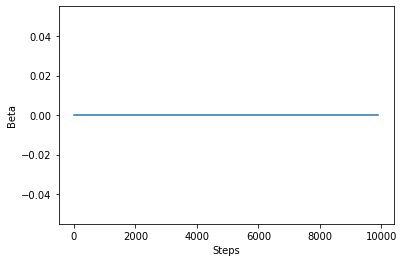

In [40]:
prep.utils = PrepUtils(prep.args, prep.paths.STORAGE_PATH)

In [41]:
import tensorflow as tf
class stepLogger(tf.keras.callbacks.Callback):
    "A Logger that log average performance per `display` steps."

    def __init__(self):
        self.step = 0

    def on_batch_end(self, batch, logs={}):
        self.step += 1

    def on_test_batch_end(self, batch, logs={}):
        wandb.log(logs, step=self.step)

In [1]:
prep.model

NameError: name 'prep' is not defined